Let's look at a sample of $Z$ boson candidates, particularly those that decay to two muons.
A selection has already been performed on the DoubleMuon sample collected by the CMS Experiment in 2011. 

(Most selections contained in this notebook come from those specified and described in "Measurement of the Inclusive W and Z Production Cross Sections in pp Collisions at $\sqrt{s}$ = 7 TeV" by the CMS Collaboration [arXiv:1107.4789].)

The selection code is here: https://github.com/tpmccauley/Zmumu-filter

The selections applied on the two muons:
* Both muons are "global" muons
* 60 < $M_{\mu\mu} < 120$ GeV
* |$\eta$| < 2.1 for both muons
* $p_{t}$ > 20 GeV

The following variables are output to a csv file: 

Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,et2,ph2,Q2,dxy2,iso2

Where

* Run, Event are the run and event numbers, respectively
* pt is the transverse momentum $p_{t}$ of the muon
* eta is the pseudorapidity of the muon: $\eta$
* phi is the $\phi$ angle of the muon direction
* Q is the charge of the muon
* dxy is the impact parameter in the transverse plane: $d_{xy}$
* iso is the track isolation: $I_{track}$

Let's read in the csv to a data frame and calculate the invariant mass $M$ of the two electrons where

$M = \sqrt{2p_{t}^{1}p_{t}^{2}(\cosh(\eta_{1}-\eta_{2}) - \cos(\phi_{1}-\phi_{2}))}$

adding a M column to the data frame:

In [1]:
import math
import numpy as np
import pandas as pd

df = pd.read_csv('./data/Zmumu_Run2011A.csv')
df['M'] = np.sqrt(2*df.pt1*df.pt2*(np.cosh(df.eta1-df.eta2) - np.cos(df.phi1-df.phi2)))

df.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,M
0,165617,74969122,54.7055,-0.432396,2.574210,1,-0.074544,0.499921,34.2464,-0.988480,-0.498704,-1,0.071222,3.42214,89.885744
1,165617,75138253,24.5872,-2.052200,2.866570,-1,-0.055437,0.000000,28.5389,0.385163,-1.991170,1,0.051477,0.00000,88.810987
2,165617,75887636,31.7386,-2.259450,-1.332290,-1,0.087917,0.000000,30.2344,-0.468419,1.883310,1,-0.087639,0.00000,88.472502
3,165617,75779415,39.7394,-0.712338,-0.312266,1,0.058481,0.000000,48.2790,-0.195625,2.970320,-1,-0.049201,0.00000,90.332620
4,165617,75098104,41.2998,-0.157055,-3.040770,1,-0.030463,1.228040,43.4508,0.590958,-0.042756,-1,0.044175,0.00000,90.514507


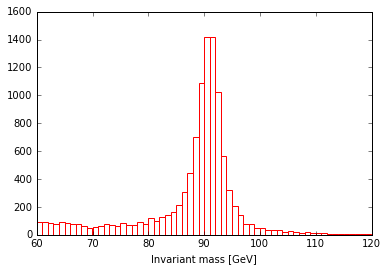

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

M_hist = np.histogram(df.M, bins=60, range=(60,120))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('Invariant mass [GeV]')
plt.show()

What does the invariant mass look like if we select for opposite-sign muons, as one would expect from $Z \rightarrow \mu^{+}\mu^{-}$?

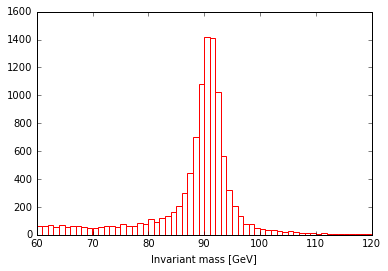

In [3]:
oppsign = df[(df.Q1 != df.Q2)]

M_hist = np.histogram(oppsign.M, bins=60, range=(60,120))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('Invariant mass [GeV]')
plt.show()

What about if we apply the following selections?

* $I_{track}$ < 3 GeV
* $d_{xy}$ < 0.2 cm

In [4]:
select = oppsign[(oppsign.iso1 < 3) & (oppsign.iso2 < 0.1) &
                 (oppsign.dxy1 < 0.2) & (oppsign.dxy2 < 0.2)]

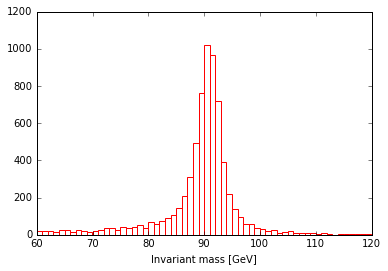

In [42]:
M_hist = np.histogram(select.M, bins=60, range=(60,120))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='r')
plt.xlabel('Invariant mass [GeV]')
plt.show()